# Exploratory Data Analysis

## 1 Problem Statement

Online Retail, a company specializing in e-commerce, recently invested a substantial portion of its revenue in an advertising campaign to boost brand and product awareness. Despite these efforts, the campaign achieved an acquisition response rate of only 3%, falling short of the anticipated 6%. Management suspects that the campaign's underperformance stemmed from its broad and costly approach, which failed to consider the diverse purchasing behaviors of customers.

To improve outcomes, the company intends to focus future marketing efforts on customers most likely to drive revenue growth. With the next campaign scheduled in six months, management seeks to achieve the following objectives:

Customer Value Analysis: Assess the commercial value of each customer just before the campaign launch.
Customer Segmentation: Develop a segmentation strategy based on purchasing behaviors to identify key customer groups.
Marketing Enablement Tool: Equip the Marketing team with a tool to implement and sustain a targeted marketing strategy.
The Data Science team has been tasked with leading this project. They will collaborate with the Marketing team responsible for promotions, the Technology team, and a Management Committee representative. Although the company's database contains some data gaps due to past system migrations, it will serve as the foundation for this initiative. The success of this project will be evaluated based on the achievement of the targeted response rate of 6%, a key performance metric set by management.


## 2.0 Import the libraries

In [1]:
# Code task 1#
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
from datetime import datetime
import requests
import calendar

## 3.0 Essential Functions for Data Analysis

In [2]:
# Code task 2#
# Create a function to graph histogram 
def hist_graph(data, title, xlabel, bins=30, kde=True,color='blue'): 
    plt.figure(figsize=(8,4))
    sns.histplot(data, bins=30, kde=kde, color= color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()

#Code task 3#
# Create a function to draw boxplot
def boxplot_graph(data, title, xlabel, color='blue'):
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()

#Code task 4#
# Separately extracts the year, month, and day from a datetime column(column) in a DataFrame (df).
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

## 4.0 Import the Data

In [3]:
# Code task 5#
# Load the dataset
df = pd.read_csv('df_clean.csv', encoding='utf-8', encoding_errors='ignore')

In [4]:
# Code task 6#
# Check on the dataset using the info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
 8   Month        406829 non-null  int64  
 9   Year         406829 non-null  int64  
 10  Day          406829 non-null  int64  
 11  Revenue      406829 non-null  float64
 12  Continent    406829 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 40.4+ MB


In [5]:
# Code task 7#
# Convert Continent in category format
df[['Continent','StockCode']] = df[['Continent','StockCode']].astype('category')

In [6]:
# Code task 8#
# Convert InvoiceDate in datetime format:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['Month']=df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day


In [7]:
#Code task 9#
# Check the Dataset after modifications
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  category      
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Month        406829 non-null  int32         
 9   Year         406829 non-null  int64         
 10  Day          406829 non-null  int32         
 11  Revenue      406829 non-null  float64       
 12  Continent    406829 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(3), int32(2), int64(2), object(3)
memory usage: 32.4+ MB


## 5.0 Summary Statistics

In [8]:
# Code task 10
# Some statistics of the Dataset
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Month,Year,Day,Revenue
count,406829.000000,406829,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570,7.605947,2010.934002,15.036128,20.401854
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,1.000000,2010.000000,1.000000,-168469.600000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000,5.000000,2011.000000,7.000000,4.200000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000,8.000000,2011.000000,15.000000,11.100000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000,11.000000,2011.000000,22.000000,19.500000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,12.000000,2011.000000,31.000000,168469.600000
std,248.693370,NaN,69.315162,1713.600303,3.418942,0.248279,8.653730,427.591718


An analysis of the statistics reveals the presence of certain extreme values:

- The minimum and maximum of the Quantity, in relation to the mean and the 0.25 and 0.75 quantiles.

- The minimum and maximum of the Income, for the same reasons mentioned above.

## 6.0 Overview of the Online Retail

### 6.1 Period Activities Covered by the Dataset

In [9]:
# Code task 11#
# Start and End Dates of Sales
print(max(df['InvoiceDate']), min(df['InvoiceDate']))

# Code task 12#
# Periode of commercial activities
print(max(df['InvoiceDate'])- min(df['InvoiceDate']))

2011-12-09 12:50:00 2010-12-01 08:26:00
373 days 04:24:00


##### The dataset covers 1 year and 8 days of activities for Online Retail.

### 6.2 Overview of Commercial Activities

In [10]:
# Code task 13#
# Consolidated Overview of Revenue, Sales Quantities, and Average Product Prices
aggregated_info = df.agg({  'Quantity': 'sum',
                            'UnitPrice': 'mean',
                            'Revenue': 'sum'
                            })

# Code task 14#
# Convert the aggregated information to a DataFrame 
aggregated_info_df = pd.DataFrame(aggregated_info).transpose() # To view the dataframe horizontally

# Code task 15#
# Number of Countries,Customers, Items and, order
info_sales_agg = df[['Country','CustomerID','Description','InvoiceNo']].nunique()

# Code task 16#
# Add the news columns of the info_sales_agg in the DataFrame aggregated_info_df
aggregated_info_df[['Country','CustomerID','Item','Order_number',]]=info_sales_agg

# Code task 17#
# Verify the changes
print(aggregated_info_df)
                                          

    Quantity  UnitPrice      Revenue  Country  CustomerID  Item  Order_number
0  4906888.0   3.460471  8300065.814       37        4372  3896         22190


##### Online Retail :
    - Serves 4,372 customers 
    - Sold 4,908,888 items
    - Operates 37 countries
    - generated sales totaling $8,300,066
    - Achieved an average price of $3.46 per item
    

## 7.0 Data Visualizations

### 7.1 Key Metric : Revenue

#### 7.1.1 Distribution of Revenue

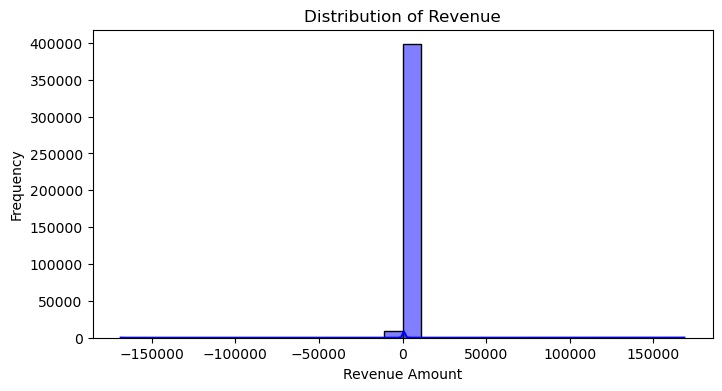

In [11]:
# Code task 18#
# Distribution of Revenue by using the function hist_graph
hist_graph(df['Revenue'],'Distribution of Revenue','Revenue Amount')


The histogram indicates the presence of negative revenues, which can be attributed to negative quantities or negative prices:
- Negative Quantities:
    . May indicate product returns or cancellations.
- Negative Prices:
    . Could represent refunds and/or discounts.
Let figure out

In [12]:
# Code task 19#
# Create a new DataFrame with the negative Revenues
negative_revenue = df[df['Revenue']<=0].reset_index()

# Code task 20#
# Exploring some columns of the new DataFrame
negative_revenue[['InvoiceDate', 'CustomerID','Description','UnitPrice','Quantity','Country','Revenue']]


,InvoiceDate,CustomerID,Description,UnitPrice,Quantity,Country,Revenue
0,2010-12-01 09:41:00,14527.0,Discount,27.50,-1,United Kingdom,-27.50
1,2010-12-01 09:49:00,15311.0,SET OF 3 COLOURED FLYING DUCKS,4.65,-1,United Kingdom,-4.65
2,2010-12-01 10:24:00,17548.0,PLASTERS IN TIN CIRCUS PARADE,1.65,-12,United Kingdom,-19.80
3,2010-12-01 10:24:00,17548.0,PACK OF 12 PINK PAISLEY TISSUES,0.29,-24,United Kingdom,-6.96
4,2010-12-01 10:24:00,17548.0,PACK OF 12 BLUE PAISLEY TISSUES,0.29,-24,United Kingdom,-6.96
...,...,...,...,...,...,...,...
8940,2011-12-09 09:57:00,14397.0,ZINC T-LIGHT HOLDER STARS SMALL,0.83,-11,United Kingdom,-9.13
8941,2011-12-09 10:28:00,15498.0,Manual,224.69,-1,United Kingdom,-224.69
8942,2011-12-09 11:57:00,15311.0,VICTORIAN SEWING BOX LARGE,10.95,-5,United Kingdom,-54.75
8943,2011-12-09 11:58:00,17315.0,HANGING HEART JAR T-LIGHT HOLDER,1.25,-1,United Kingdom,-1.25


##### Prices appear to be positive. To confirm, we will analyze their distribution using a histogram

#### UnitPrice Distribution

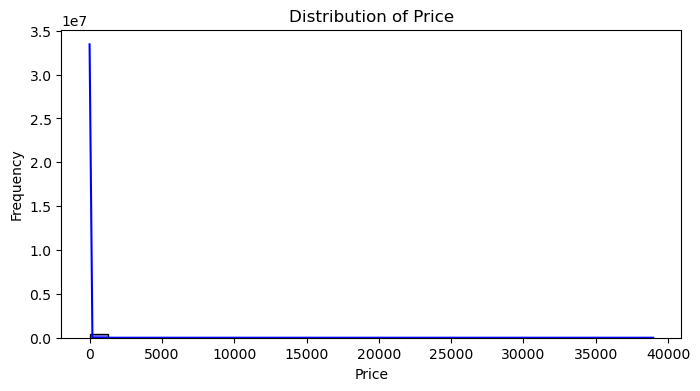

In [13]:
# Code task 21#
# Draw the distribution of Unit price using the function hist_graph
hist_graph(df['UnitPrice'],'Distribution of Price', 'Price')

##### All prices are confirmed to be positive. Therefore, negative revenues are attributed to negative quantities, which we will consider as item returns
##### We'll separate Returns for Further Analysis

#### 7.1.2 Analysis of Negative Revenue

In [14]:
# Code task 22#
# Add a column to flag returns
df['TransactionType'] = df['Quantity'].apply(lambda x: 'Return' if x < 0 else 'Purchase')

# Code task 23#
# Separate returns and purchases
returns = df[df['TransactionType'] == 'Return']
purchases = df[df['TransactionType'] == 'Purchase']

Let's pinpoint the products with the highest return rates.
The formula below will be used to calculate the return rate: 
Return Rate= 100* (Total Returns (absolute value)) / Total Purchases

##### 7.1.2-1 Return rate Calculation

In [15]:
# Code task 24# 
# Identify the absolute quantity of returned products by performing a left join on the purchases and returns DataFrames.
product_stats = purchases.groupby('Description').agg(
                                                TotalPurchases=('Quantity', 'sum')
                            ).join(
                returns.groupby('Description').agg(
                                                TotalReturns=('Quantity', lambda x: abs(x.sum()))
    ),
                        how='left'  
).fillna(0)

# Code task 25#
# Calculate Return Rate (%), handle division by zero
product_stats['ReturnRate'] = product_stats['TotalReturns'] / product_stats['TotalPurchases'] * 100

# Code task 26#
# Display the return rate for each item in descending order
product_stats.sort_values('ReturnRate', ascending=False)

,TotalPurchases,TotalReturns,ReturnRate
Description,,,
BLUE PADDED SOFT MOBILE,1,7.0,700.000000
ROBIN CHRISTMAS CARD,3,12.0,400.000000
PINK CHERRY LIGHTS,4,8.0,200.000000
3 WICK CHRISTMAS BRIAR CANDLE,2,4.0,200.000000
CHALKBOARD KITCHEN ORGANISER,6,10.0,166.666667
...,...,...,...
JUNGLE POPSICLES ICE LOLLY HOLDERS,121,0.0,0.000000
KEEP CALM BIRTHDAY WRAP,50,0.0,0.000000
KEEP CALM WALL ART,269,0.0,0.000000


##### We encountered return rates exceeding 100%, which is an anomaly. We will discard these anomalies for now, which can be clarified in a subsequent step, and focus on 100% or less return rates.

In [16]:
# Code task 27#
# Flag anomalies where Return Rate > 100%
product_stats['Anomaly'] = product_stats['ReturnRate'] > 100

# Code task 28#
# Remove anomalies for clean analysis 
clean_product_stats = product_stats[~product_stats['Anomaly']]

# Code task 29#
# Display flagged clean results
clean_product_stats.sort_values('ReturnRate', ascending=False)


,TotalPurchases,TotalReturns,ReturnRate,Anomaly
Description,,,,
HANGING RIDGE GLASS T-LIGHT HOLDER,36,36.0,100.0,False
GLASS CAKE COVER AND PLATE,2,2.0,100.0,False
2 DAISIES HAIR COMB,6,6.0,100.0,False
DROP DIAMANTE EARRINGS GREEN,6,6.0,100.0,False
DIAMANTE HAIR GRIP PACK/2 PERIDOT,6,6.0,100.0,False
...,...,...,...,...
JUMBO BAG VINTAGE DOILEY,143,0.0,0.0,False
JUNGLE POPSICLES ICE LOLLY HOLDERS,121,0.0,0.0,False
KEEP CALM BIRTHDAY WRAP,50,0.0,0.0,False


##### 7.1.2-3 Top 10 items by return rate

In [17]:
# Code task 30#
# Top ten items by return rate
top_ten_return = clean_product_stats.sort_values('ReturnRate',ascending=False).head(10)
top_ten_return

,TotalPurchases,TotalReturns,ReturnRate,Anomaly
Description,,,,
HANGING RIDGE GLASS T-LIGHT HOLDER,36,36.0,100.0,False
GLASS CAKE COVER AND PLATE,2,2.0,100.0,False
2 DAISIES HAIR COMB,6,6.0,100.0,False
DROP DIAMANTE EARRINGS GREEN,6,6.0,100.0,False
DIAMANTE HAIR GRIP PACK/2 PERIDOT,6,6.0,100.0,False
DIAMANTE HAIR GRIP PACK/2 CRYSTAL,6,6.0,100.0,False
DAISY HAIR COMB,6,6.0,100.0,False
"PAPER CRAFT , LITTLE BIRDIE",80995,80995.0,100.0,False
BLACK CHERRY LIGHTS,8,8.0,100.0,False


###### It is important to highlight the exceptionally high return rate of this item "PAPER CRAFT , LITTLE BIRDIE"

##### 7.1.2-4 Items to be reconsidered for sale

High Return Rate (>= 80.0%) indicates potential issues with quality, customer satisfaction, or suitability. Online Retail should carefully evaluate whether to continue marketing these items. 

In [18]:
# Code task 31#
# Items with a return rate more than 80.0%
rejected_item = clean_product_stats[clean_product_stats['ReturnRate']>=80.0]

# Code task 32#
# Display the Items to reconsider
rejected_item.sort_values('ReturnRate', ascending=False)

,TotalPurchases,TotalReturns,ReturnRate,Anomaly
Description,,,,
2 DAISIES HAIR COMB,6,6.0,100.000000,False
GLASS CAKE COVER AND PLATE,2,2.0,100.000000,False
WHITE BEADED GARLAND STRING 20LIGHT,3,3.0,100.000000,False
SET 10 CARDS HANGING BAUBLES 17080,1,1.0,100.000000,False
PURPLE ENAMEL FLOWER HAIR TIE,6,6.0,100.000000,False
PINK DAISY BAG CHARM,6,6.0,100.000000,False
"PAPER CRAFT , LITTLE BIRDIE",80995,80995.0,100.000000,False
BLACK 3 BEAD DROP EARRINGS,6,6.0,100.000000,False
HANGING RIDGE GLASS T-LIGHT HOLDER,36,36.0,100.000000,False


Alongside PAPER CRAFT and LITTLE BIRDIE, MEDIUM CERAMIC TOP STORAGE JAR also has a high volume of returned items.

#### 7.1.3 Top selling product by Revenue

To analyze sales trends, we will alternately use the 'Purchases' DataFrame, which excludes item returns, and the 'df' DataFrame, which includes them. This approach will enable us to measure the impact of item returns on commercial activity

##### 7.1.3-1 Top selling product by Revenue with and without returns

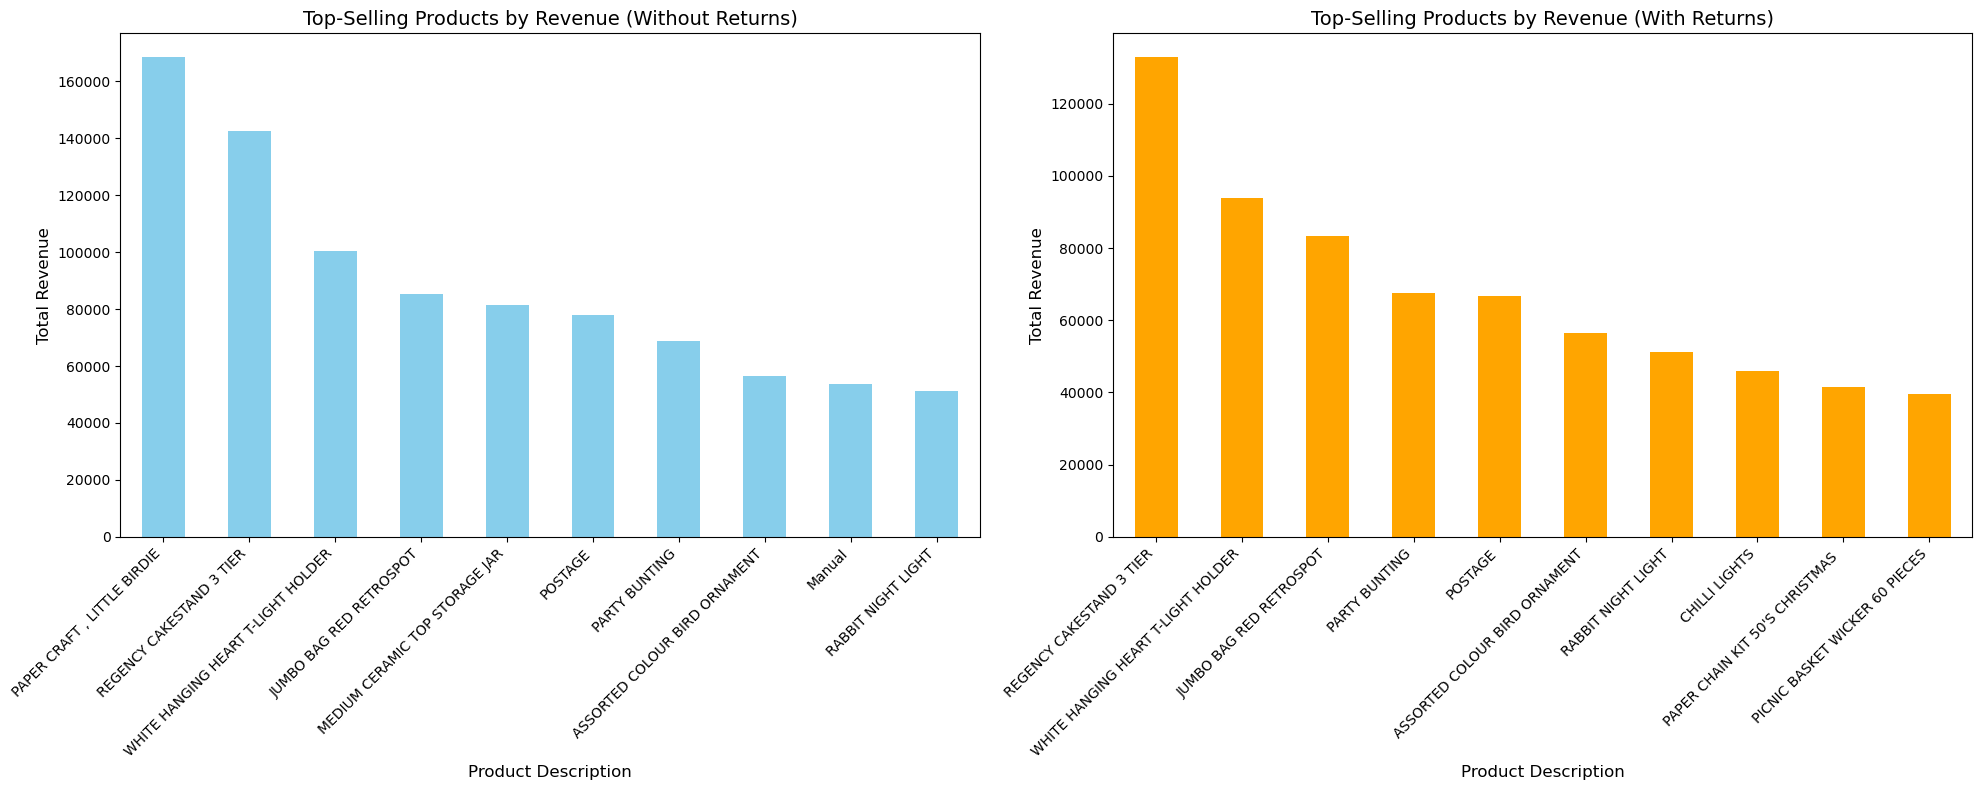

In [19]:
# Code task 33: Summarize total revenue for top-selling products (without returns)
top_products_without_returns = (
    purchases.groupby('Description')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Code task 34: Summarize total revenue for top-selling products (with returns)
top_products_with_returns = (
    df.groupby('Description')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # Wider figure

# Plot: Top-Selling Products by Revenue without returns
top_products_without_returns.plot(
    kind='bar', color='skyblue', ax=axes[0]
)
axes[0].set_title("Top-Selling Products by Revenue (Without Returns)", fontsize=14)
axes[0].set_xlabel("Product Description", fontsize=12)
axes[0].set_ylabel("Total Revenue", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_xticklabels(axes[0].get_xticklabels(), ha='right')

# Plot: Top-Selling Products by Revenue with returns
top_products_with_returns.plot(
    kind='bar', color='orange', ax=axes[1]
)
axes[1].set_title("Top-Selling Products by Revenue (With Returns)", fontsize=14)
axes[1].set_xlabel("Product Description", fontsize=12)
axes[1].set_ylabel("Total Revenue", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xticklabels(axes[1].get_xticklabels(), ha='right')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

When returns are excluded, PAPER CRAFT, LITTLE BIRDIE, and MEDIUM CERAMIC TOP STORAGE JAR rank among the top 10 revenue-generating items, occupying the first and fifth positions, respectively. This indicates a strong demand for these products.

However, when returns are factored in, these items do not appear in the top 10 revenue-generating list. Instead, they are among the products that require a quality review. Given the high demand for these products, Online Retail could consider marketing a higher-quality competing product.

The top ten most profitable products are led by REGENCY CAKESTAND 3 TIER, WHITE HANGING T-LIGHT HOLDER, and JUMBO BAG RED RETROSPOT

### 7.1.4 Revenue by Continent

#### 7.1.4-1 Top 10 Countries by Revenue

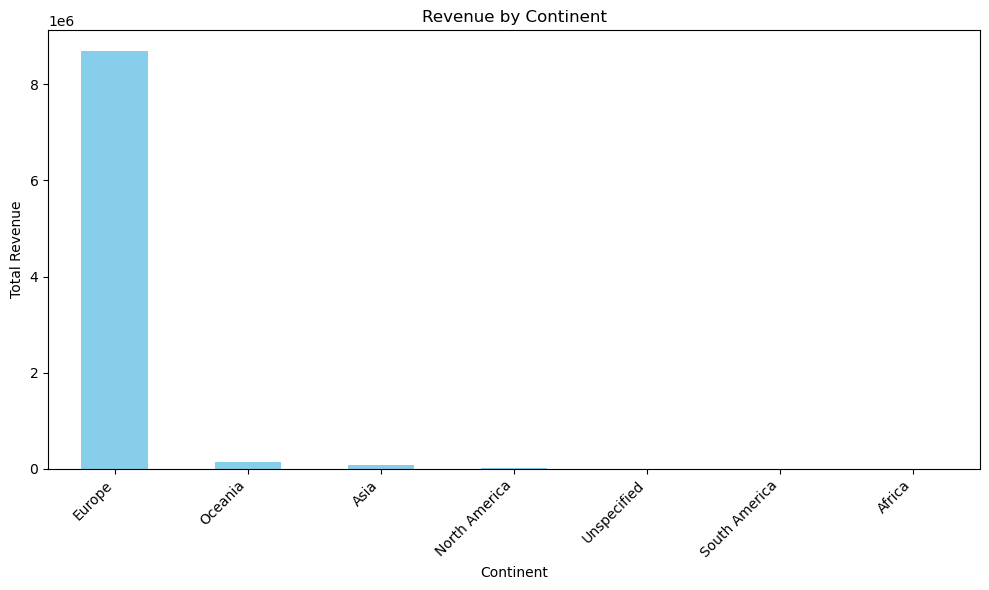

In [20]:
# Code task 35#
# Summarize total revenue by country
df_continent = purchases.groupby('Continent')[['Revenue', 'CustomerID', 'Quantity','UnitPrice']]\
            .agg({'Revenue':'sum', 'CustomerID':'count', 'Quantity':'sum','UnitPrice':'mean'})

# Code task 36#
# Plot: Revenue by Continent
plt.figure(figsize=(10, 6))
df_continent['Revenue'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Revenue by Continent")
plt.xlabel("Continent")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Europe is the largest contributor to Online Retail Revenue by a significant margin, followed distantly by Oceania and Asia.

#### 7.1.4-2 Revenue by Continent - Average Revenue and Average Sale by customer

In [21]:
# Code task 37#
# Insert the Average Revenue in df_continent
df_continent['Avg_Revenue_by_Customer'] = df_continent['Revenue'] / df_continent['CustomerID']

# Code task 38#
# Insert the Average Sale in df_continent
df_continent['Avg_Sale_by_Customer'] = df_continent['Quantity'] / df_continent['CustomerID']

# Code task 39#
# Display df_continent sorted by Average Revenue by Customer and Average Sale by Customer in decreasing order
df_continent.sort_values(by=['Avg_Revenue_by_Customer', 'Avg_Sale_by_Customer'], ascending=False)

,Revenue,CustomerID,Quantity,UnitPrice,Avg_Revenue_by_Customer,Avg_Sale_by_Customer
Continent,,,,,,
Oceania,138521.310,1185,84209,3.048523,116.895620,71.062447
Asia,70207.830,930,37011,16.219441,75.492290,39.796774
South America,1143.600,32,356,4.456250,35.737500,11.125000
Europe,8690619.014,395145,5052758,3.084459,21.993494,12.787098
North America,7246.770,330,5221,4.011758,21.959909,15.821212
Africa,1002.310,58,352,4.277586,17.281207,6.068966
Unspecified,2667.070,244,1789,3.200820,10.930615,7.331967


Let's include a graph with this table to enhance our understanding of the analysis.

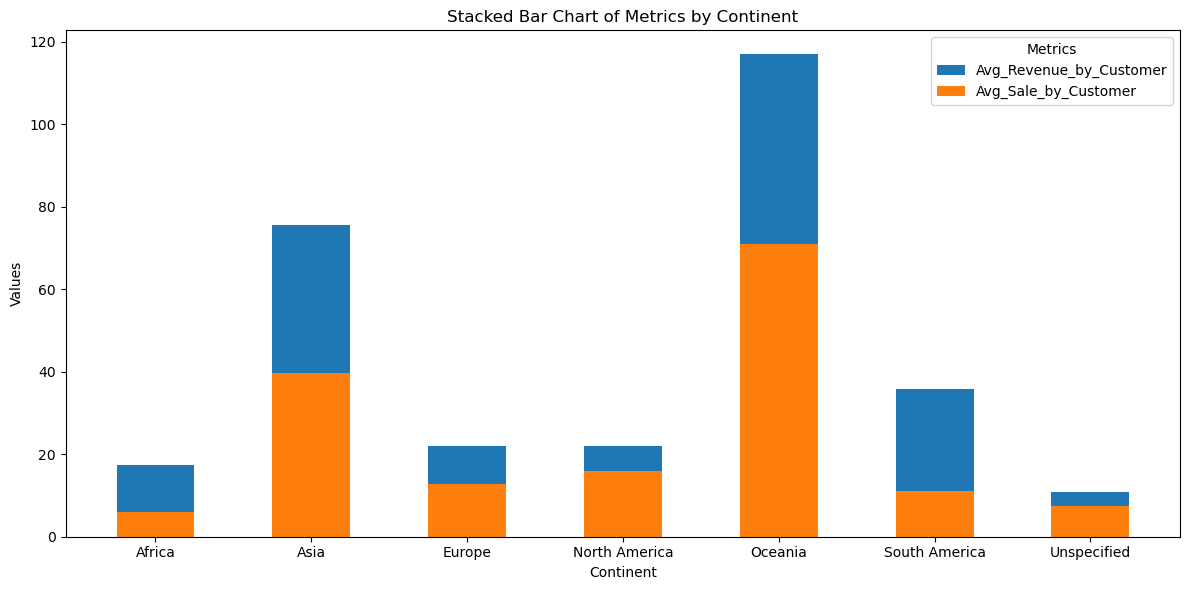

In [22]:
# Code task 40#
# Create a stacked bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.5

# Stacked bars for the metrics
plt.bar(df_continent.index, df_continent['Avg_Revenue_by_Customer'], 
        label='Avg_Revenue_by_Customer', width=bar_width)
plt.bar(df_continent.index, df_continent['Avg_Sale_by_Customer'], 
       label='Avg_Sale_by_Customer', width=bar_width)

# Labels and title
plt.xlabel('Continent')
plt.ylabel('Values')
plt.title('Stacked Bar Chart of Metrics by Continent')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()


Although Europe is the continent that generates the most revenue, Oceania and Asia appear as the continents with the highest average purchases and incomes by customer. These markets represent a great development potential for Online Retail.
"Asia is the continent where the most expensive products are sold, with an average price by customer five times higher than that of products sold in Europe."

### 7.1.5 Revenue By Country

#### 7.1.5.1 Top ten Countries by Revenue

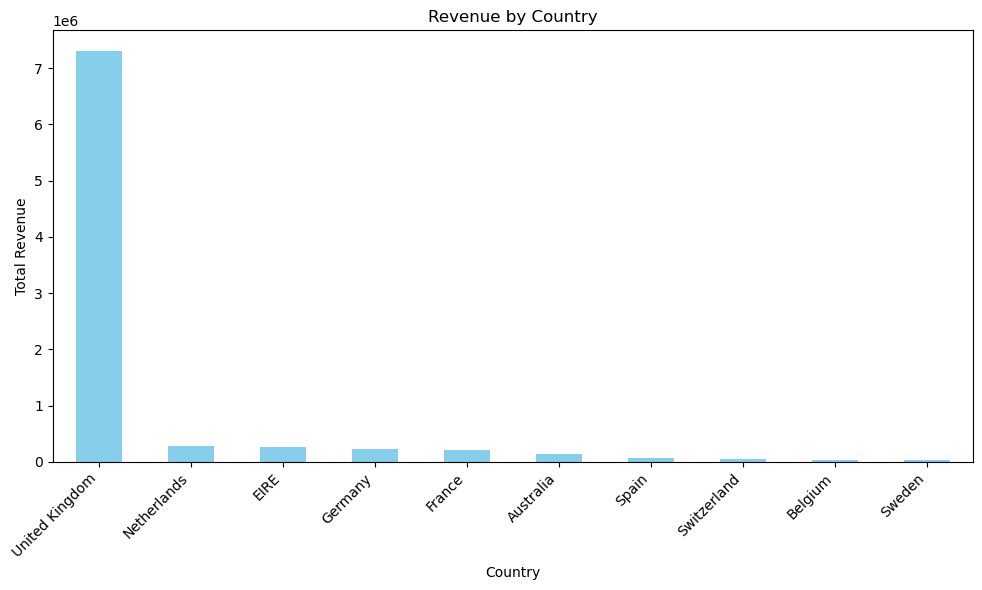

In [23]:
# Code task 41#
# Summarize total revenue by country
df_country = purchases.groupby('Country')[['Revenue', 'CustomerID', 'Quantity','UnitPrice']]\
            .agg({'Revenue':'sum', 'CustomerID':'count', 'Quantity':'sum','UnitPrice':'mean'})

# Code task 42#
# Sort the new dataframe by 'Revenue'
df_country_sorted = df_country.sort_values(by='Revenue',ascending=False)

# Code task 43#
# Plot: Revenue by Continent
plt.figure(figsize=(10, 6))
df_country_sorted['Revenue'].head(10).plot(kind='bar', color='skyblue')
plt.title("Revenue by Country")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 7.1.6 Revenue By Customer

### 7.1.6-1 Top ten Customers by Revenue

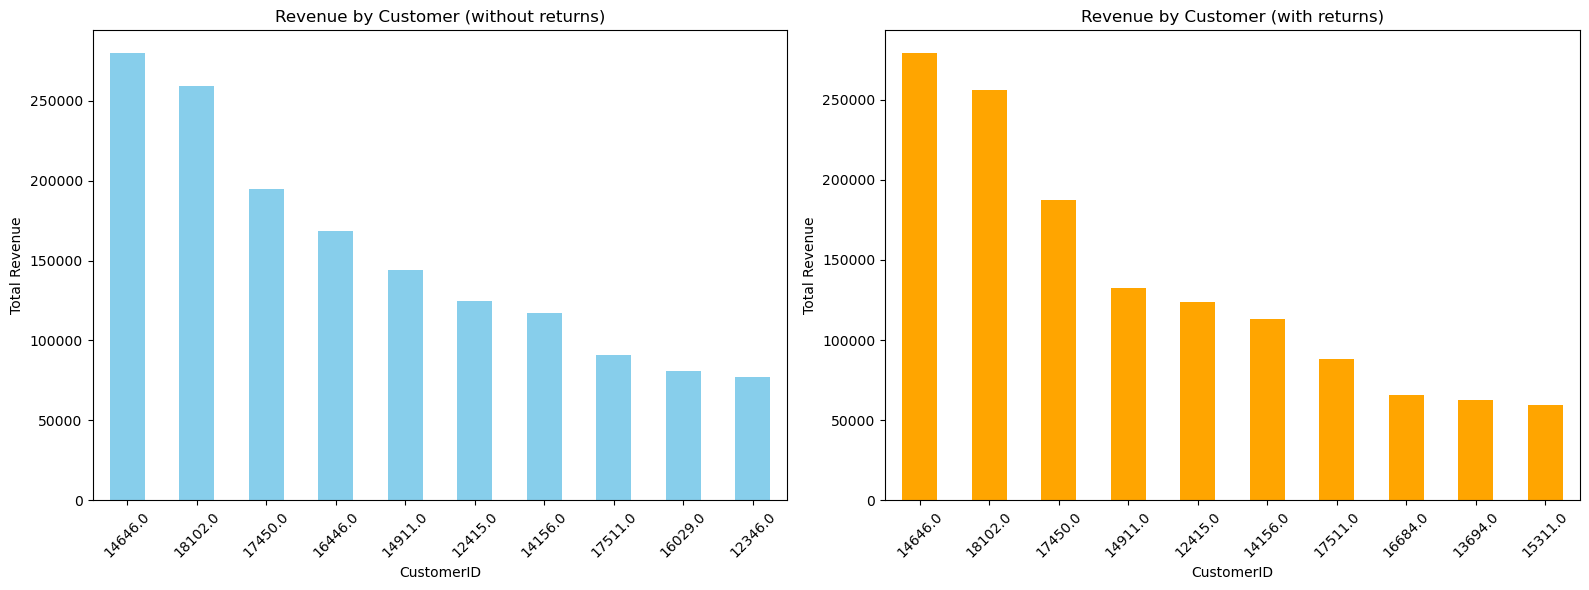

In [24]:
# Code task 44#
#Summarize total revenue by CustomerID
df_customer_1 = purchases.groupby('CustomerID')['Revenue'].sum() # Negative revenues not include in this DataFrame
df_customer_2 = df.groupby('CustomerID')['Revenue'].sum() # DataFrame with negative values included

# Code task 45#
#Sort the dataframes by Revenue
df_customer_sorted_1 = df_customer_1.sort_values(ascending=False)
df_customer_sorted_2 = df_customer_2.sort_values(ascending=False)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Code task 46#
#Plot Revenue by customer for the first dataset
df_customer_sorted_1.head(10).plot(
    kind='bar', color='skyblue', ax=axes[0]
)
axes[0].set_title("Revenue by Customer (without returns)")
axes[0].set_xlabel("CustomerID")
axes[0].set_ylabel("Total Revenue")
axes[0].tick_params(axis='x', rotation=45)

# Plot Revenue by customer for the second dataset
df_customer_sorted_2.head(10).plot(
    kind='bar', color='orange', ax=axes[1]
)
axes[1].set_title("Revenue by Customer (with returns)")
axes[1].set_xlabel("CustomerID")
axes[1].set_ylabel("Total Revenue")
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

The following customer ID numbers from the first list are missing in the second list: 1646.0 and 16029.0. Let's examine the quantities of products ordered by these customers.

In [25]:
# Code 47#
# List of the Quantity items order by the CustomerID : 16446.0
df[df['CustomerID']==16446.0]['Quantity']

137062        1
137063        1
406349    80995
406350   -80995
Name: Quantity, dtype: int64

The quantity of 80995 appears to be an input error that was corrected by adding its opposite. These two values represent the extreme values mentioned earlier and will need to be removed from the DataFrame.

In [26]:
# Code 48#
# List of the Quantity items ordered by the CustomerID: 16029.0
df[(df['CustomerID'] == 16029.0) & (df['Quantity'] < 0)]['Quantity']


27277      -24
81590     -144
81591      -96
81592      -96
121297      -1
121405      -1
138687     -48
171599      -1
199234      -1
219859      -1
247564      -1
247565      -1
289768    -100
289769    -300
289770    -192
289771    -200
289772     -72
289773    -100
289774    -200
289808    -240
289809    -192
289810    -144
289811    -720
289812    -600
289813    -840
289814   -1296
289815    -144
289816    -144
289817    -720
289818   -1296
289819    -144
300320      -1
Name: Quantity, dtype: int64

This customer's situation is different. Rather, he is a customer with a large number of item returns.

These two examples highlight the ambiguity in determining the real reason for negative quantities. Improvements in the information collection structure should be considered to address this issue.

All in all, the most profitable customers are the customers whose identity codes appear in the figure on the left.

### 7.1.6 Revenu Trends Over Time

#### 7.1.6-1 Monthly Trends

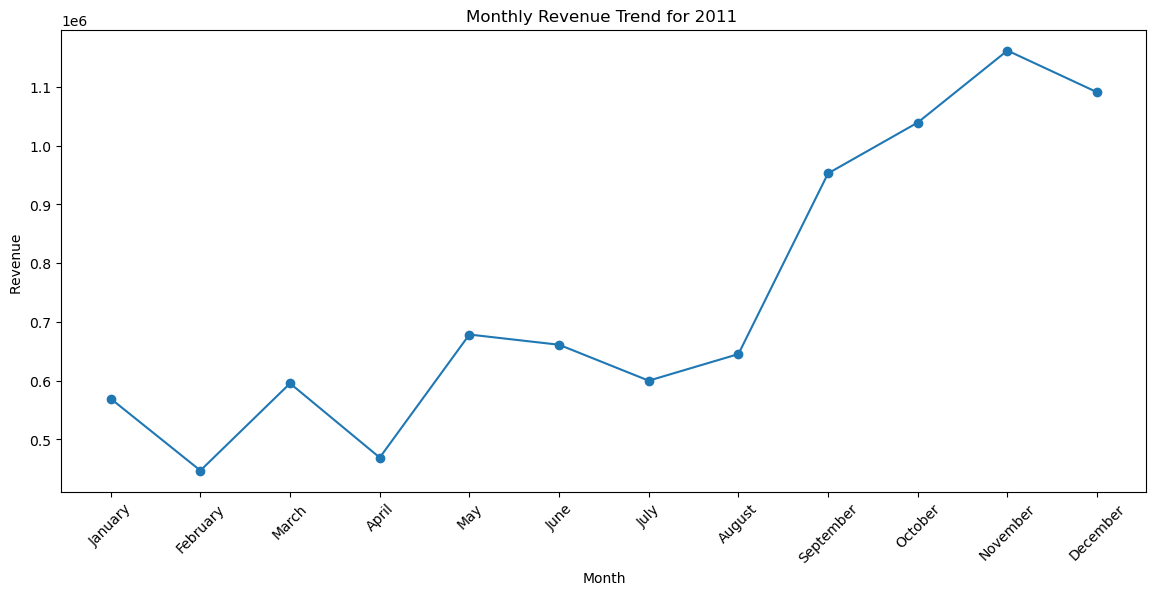

In [27]:
# Code task 49#
# Group revenue by Month for monthly sales trends
monthly_sales = purchases.groupby('Month')['Revenue'].sum()

# Code task 50#
# Map numeric month index to full month names
monthly_sales.index = monthly_sales.index.map(lambda x: calendar.month_name[int(x)])

# Code task 51#
# Visualize trends
plt.figure(figsize=(14, 6))

# Monthly Sales Trend
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title("Monthly Revenue Trend for 2011 ")
plt.xlabel("Month")
plt.ylabel("Revenue ")
plt.tick_params(axis='x', rotation=45)



Revenues have generally increased throughout the year, with growth accelerating from August and peaking in November.

#### 7.1.6-1 Dayly Trends

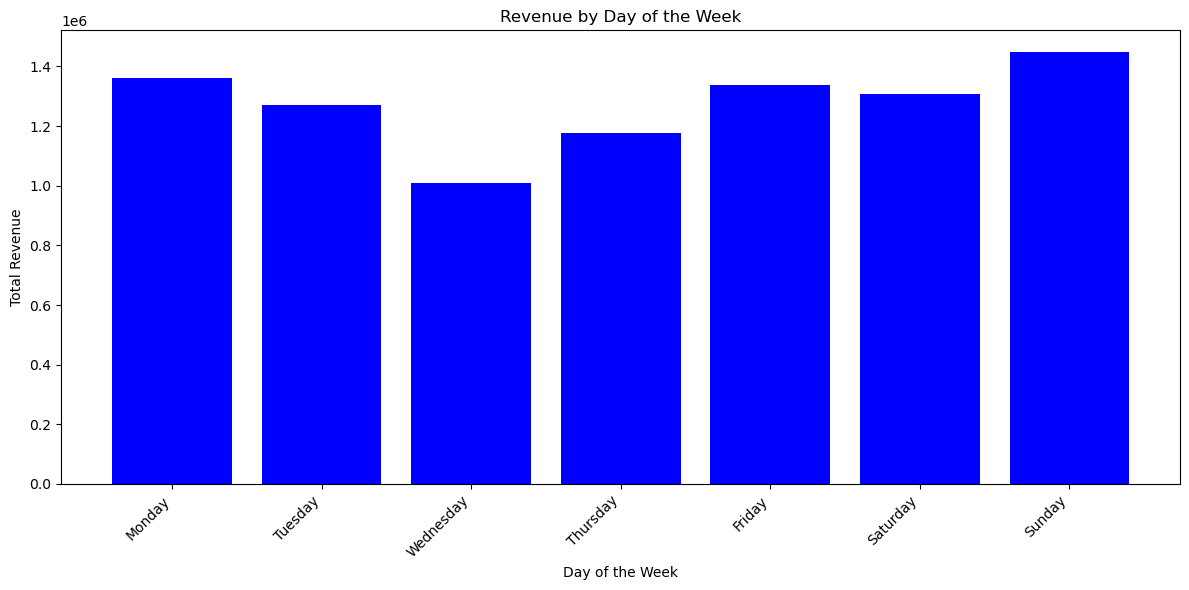

In [28]:
# Code task 52#
# Group revenue by Weekday for day-of-week trends
weekday_sales = purchases.set_index('Day')

# Code task 53#
# Reference year to map days to weekdays
reference_year = 2011
reference_month = 1  # January for consistent day mapping

# Code task 54#
# Map numeric day index to weekday names
weekday_sales.index = weekday_sales.index.map(
    lambda day: calendar.day_name[datetime(reference_year, reference_month, int(day)).weekday()]
)

# Code task 55#
# Ensure the index is reset for grouping (convert index to a column)
weekday_sales = weekday_sales.reset_index().rename(columns={'Day': 'Weekday'})

# Code task 56#
# Group by weekday name and aggregate revenue
weekday_sales_grouped = weekday_sales.groupby('Weekday', sort=False)['Revenue'].sum()

# Code task 57#
# Order the weekdays for proper chronological display
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales_grouped = weekday_sales_grouped.reindex(weekday_order)

# Code task 58#
# Plot the weekday sales
plt.figure(figsize=(12, 6))
plt.bar(weekday_sales_grouped.index, weekday_sales_grouped.values, color='blue')
plt.title("Revenue by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Sunday is the most profitable day of the week, generating the highest revenue. Conversely, Wednesdays see the lowest customer activity and revenue. Therefore, if site maintenance is necessary, it could be scheduled on Wednesdays.

## 8.0 Segmentation of the Customers

###  8.1 Time Cohort Analysis : Segmentation by Time of the first purchase

We'll perform a Time cohorts segmentation of the customers based on their first purchase. We adopt the following conventions:

- The month will serve as our time reference.
- Each month, a new cohort begins. A cohort will be identified as follows: Year-month-1, with Year and month representing the year and month of the customer's first purchase. For this identification, we will use the following function : 
     def get_month (x):
    return dt.datetime(x.year, x.month,1)

In [29]:
def get_month (x):
    return dt.datetime(x.year, x.month,1)

#### 8.1.2 Create the acquisition month for each customer

In [30]:
# Code task 59#
# Make a copy of purchases
df_cohort = df.copy()

#Code task 60#
# Use .loc[] to assign the 'InvoiceMonth' column
df_cohort.loc[:, 'InvoiceMonth'] = df_cohort['InvoiceDate'].apply(get_month)

# Code task 61#
# Group by 'CustomerID' and use the InvoiceMonth' column for further manipulation
grouping = df_cohort.groupby('CustomerID')['InvoiceMonth']

# Code task 62#
# Use transform() with min to assign the smallest InvoiceMonth value to each customer
df_cohort.loc[:, 'CohortMonth'] = grouping.transform('min')

# Code task 63#
# Display the updated DataFrame
df_cohort.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Day,Revenue,Continent,TransactionType,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,1,15.30,Europe,Purchase,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,1,20.34,Europe,Purchase,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,1,22.00,Europe,Purchase,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,1,20.34,Europe,Purchase,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,1,20.34,Europe,Purchase,2010-12-01,2010-12-01


### 8.1.3 Build the Cohorts

In [31]:
# This function extracts the integer values of the Year, Month, and Day from a DateTime type object
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

As our time reference is month, we'll calculate the number of months between any transaction and the first transaction for each customer

In [32]:
# Code 64#
# Using the get_date_int to extract integer related to the Year and the month in InvoiceMonth and CohortMonth
invoice_year, invoice_month, _ = get_date_int(df_cohort, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(df_cohort, 'CohortMonth')

# Code 65#
# Calculate the total year difference between the first year of the cohort and any InvoiceDate
years_diff = invoice_year - cohort_year

# Code 66#
# Calculate the total month difference between the first month of the cohort and any InvoiceDate
months_diff = invoice_month - cohort_month

# Code 67#
# Build 'CohortIndex' by Converting the total difference to month and adding them together
df_cohort.loc[:, 'CohortIndex'] = years_diff * 12 + months_diff + 1

# Code 68#
# Display the updated DataFrame
df_cohort.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Day,Revenue,Continent,TransactionType,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,1,15.30,Europe,Purchase,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,1,20.34,Europe,Purchase,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,1,22.00,Europe,Purchase,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,1,20.34,Europe,Purchase,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,1,20.34,Europe,Purchase,2010-12-01,2010-12-01,1


### 8.1.4 Cohort metrics

#### 8.1.4-1 Monthly active customers from each cohort

In [33]:
# Code task 69# 
# Create a groupby object with CohortMonth and CohortIndex
grouping = df_cohort.groupby(['CohortMonth', 'CohortIndex'])

# Code task 70#
# Count the unique number of customers in each group by applying nunique function 
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index() # Reset the index

# Code task 71#
# Create a pivot table to display unique customer counts
cohort_counts = cohort_data.pivot_table(index='CohortMonth',
                                  columns='CohortIndex',
                                  values='CustomerID')

# Code task 72#
# Display the pivot table
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 8.1.4-2 Retention rate

In [34]:
# Code task 73#
# Store the first column as cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Code task 74#
# Divide all values in the cohort_counts table by cohort_sizes
retention = cohort_counts.divide(cohort_sizes, axis=0) # axis =0 to ensure the division along the row axis

#Code task 75#
# Review the retention table
retention.round(3) * 100 # round to 3 digits and multiply by 100 to express in percentage

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


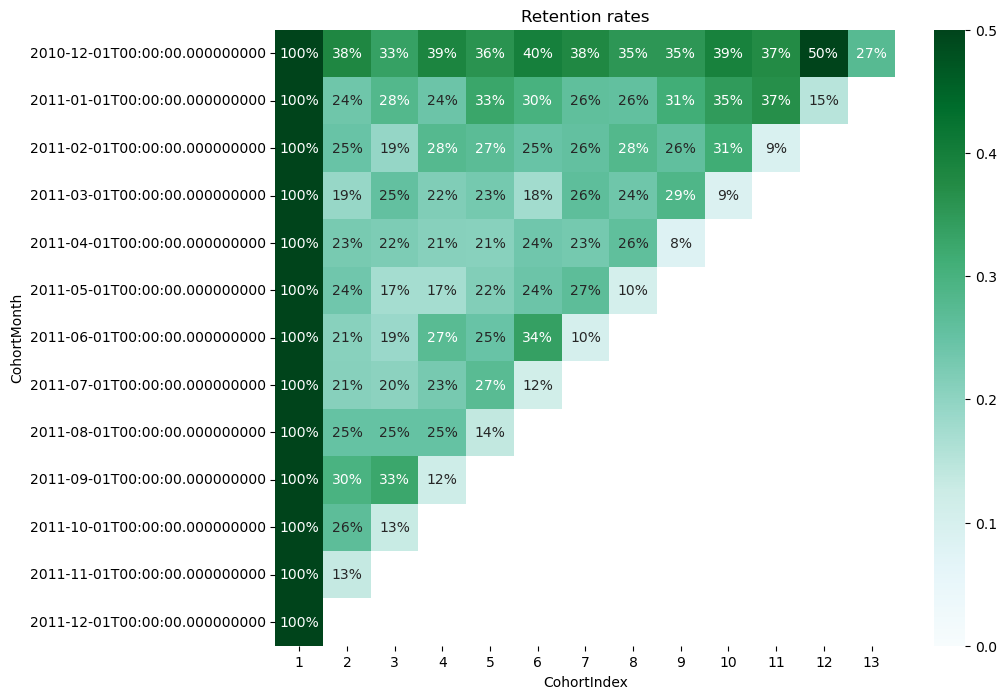

In [35]:
# Code 76#
# Build a Heatmap
plt.figure(figsize=(10,8))
plt.title('Retention rates')
sns.heatmap(data = retention, annot = True, fmt= '.0%', vmin=0.0, vmax=0.5, cmap = 'BuGn')
plt.show()


#### 8.1.4-3 Average quantity sale

In [36]:
# Code task 77#
# Create a groupby object with 'CohortMonth' and 'CohortIndex'
grouping = df_cohort.groupby(['CohortMonth', 'CohortIndex'])

# Code task 78#
# Calculate the average sale quantity by applying the mean method to the groupby object
cohort_data = grouping['Quantity'].mean()

# Code task 79#
# Reset the index
cohort_data = cohort_data.reset_index()

# Code task 80#
# Create a pivot table of average quantity sale
average_quantity = cohort_data.pivot_table(index='CohortMonth',columns='CohortIndex', values='Quantity')

# Code task 81#
# Display the pivot table
average_quantity.round(1) # Round to 1 digit

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.0,14.6,15.0,14.8,12.9,14.3,15.2,14.8,16.7,16.7,17.3,12.8,14.8
2011-01-01,10.0,12.6,12.3,10.9,12.2,14.9,14.2,14.4,11.4,9.9,9.1,9.5,NaN
2011-02-01,10.8,12.1,18.6,12.0,11.1,11.4,13.3,12.4,10.3,11.9,12.6,NaN,NaN
2011-03-01,9.8,9.9,12.2,9.5,13.6,12.3,13.2,12.2,10.5,8.9,NaN,NaN,NaN
2011-04-01,9.8,10.1,9.4,11.6,11.5,8.2,9.7,9.3,7.3,NaN,NaN,NaN,NaN
2011-05-01,10.9,9.0,13.9,11.8,10.9,8.7,10.1,7.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.3,13.7,10.5,13.3,10.2,9.8,9.3,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.7,12.7,7.1,7.8,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,9.9,6.0,5.3,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###  8.2 RFM Segmentation

### 8.2.1 RFM metrics : Recency, Frequency, Monetary

In [37]:
# Code 82#
# Check on the period covert by the dataset
print('Min:{}; Max:{}'.format(min(purchases.InvoiceDate), max(purchases.InvoiceDate)))

Min:2010-12-01 08:26:00; Max:2011-12-09 12:50:00


In [38]:
# Code 83#
# Fix a snapshot_day
snapshot_date = max(df.InvoiceDate) + dt.timedelta(days=1)

In [39]:
#Code 84
# Aggregate df on a customer level
df_rfm = df_cohort.groupby(['CustomerID']).agg({
    'InvoiceDate' : lambda x : (snapshot_date - x.max()).days, # To x.max() to have the last day of transaction
    'InvoiceNo': 'count',
    'Revenue': 'sum'})

#Code 85#
# Rename columns for easier interpretation
df_rfm.rename(columns = {'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'Revenue': 'MonetaryValue'}, inplace=True)

#Code 86#
# Check the first rows
df_rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


### 8.2.2 Building Segmentation

#### 8.2.2-1 Segmentation by recency

In [40]:
# Code 87#
# Label for the recency
r_labels = range(4, 0, -1) # Attribute an higher rate to the customers who have been active more recently

# Code 88#
# Use the fonction qcut to divide the customers in 4 equal groupes based on the quantiles for recency
r_quartiles = pd.qcut(df_rfm['Recency'], q=4, labels = r_labels)

# Code 89#
# Assign the value to a column call R
df_rfm = df_rfm.assign(R = r_quartiles.values)
df_rfm

,Recency,Frequency,MonetaryValue,R
CustomerID,,,,
12346.0,326,2,0.00,1
12347.0,2,182,4310.00,4
12348.0,75,31,1797.24,2
12349.0,19,73,1757.55,3
12350.0,310,17,334.40,1
...,...,...,...,...
18280.0,278,10,180.60,1
18281.0,181,7,80.82,1
18282.0,8,13,176.60,4


#### 8.2.2-2 Segmentation by Frequency and Monetary

In [41]:
# Code 90#
# Labels for frequency and monetary values
f_labels = range(1,5)
m_labels = range(1,5)

# Code 91#
# Divide the customers in 4 equal groups based on the quantiles by using the qcut function
f_quartiles = pd.qcut(df_rfm['Frequency'], q=4, labels = f_labels)
m_quartiles = pd.qcut(df_rfm['MonetaryValue'], q=4, labels = m_labels)

# Code 92#
# Assign the values to a column F for frequency and M for monetary
df_rfm = df_rfm.assign(F = f_quartiles.values)
df_rfm = df_rfm.assign(M = m_quartiles.values)
df_rfm

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2
...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1
18281.0,181,7,80.82,1,1,1
18282.0,8,13,176.60,4,1,1


#### 8.2.2-4 Score Segmentation by Recency, by Frequency and by Monetary

In [42]:
# Code 93#
# Function to define segments by concatenating frequency, recency, and monetary scores 
def join_rfm(x):
    return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))

In [43]:
# Code 94#
# Apply a segment code on each customer
df_rfm['RFM_Segment'] = df_rfm.apply(join_rfm, axis=1)

# Code 95#
# Calculate the overall score for each customer.
df_rfm['RFM_Score'] = df_rfm[['R','F','M']].sum(axis=1)
df_rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3
12347.0,2,182,4310.00,4,4,4,444,12
12348.0,75,31,1797.24,2,2,4,224,8
12349.0,19,73,1757.55,3,3,4,334,10
12350.0,310,17,334.40,1,1,2,112,4
...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3
18281.0,181,7,80.82,1,1,1,111,3
18282.0,8,13,176.60,4,1,1,411,6


#### 8.2.2-5 Define the Segments 

In [44]:
# Code task 96#
# Aggregate RFM Score
df_rfm.groupby('RFM_Score').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue': ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           264.8       7.8         109.1   392
4           174.5      13.9         227.1   391
5           153.0      21.2         346.8   517
6            94.3      28.5         491.8   468
7            78.8      39.7         724.2   447
8            62.7      57.0         974.7   467
9            44.2      79.0        1369.6   411
10           31.3     115.3        1894.0   440
11           20.5     193.9        3845.7   368
12            6.7     371.8        8850.7   471

In [45]:
# Code 97#
# Function to define the segments
def segment_me(df):
    if df['RFM_Score'] >=9:
        return 'Gold'
    elif df['RFM_Score'] >=5 and df['RFM_Score'] < 9:
        return 'Silver'
    else:
        return 'Bronze'

In [46]:
# Code 98#
# Apply the function segment_me on General_Segment
df_rfm['General_Segment']= df_rfm.apply(segment_me, axis=1)
df_rfm.groupby('General_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Bronze            219.7      10.9         168.0   783
Gold               25.2     195.1        4130.3  1690
Silver             98.9      36.1         625.8  1899

## 9.0 Conclusion


The most profitable markets, both at the continental and country levels, have been identified. The customers generating the most revenue and the most profitable products have been highlighted.

The analysis of revenue trends over time (by month and week) has provided valuable insights for both administrative and financial decision-making.

Additionally, customer behavior has been studied through two types of segmentation:
- Segmentation by time of first purchase
- Segmentation by RFM (Recency, Frequency, Monetary)



END